# Cleaning

### import bibliothèques

In [2]:
# pour la manipulation des données
import pandas as pd

# pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# pour les valeurs manquantes
import missingno as msno

# pour récupérer les outliers
from matplotlib.cbook import boxplot_stats

### import du csv

In [3]:
df_assurance = pd.read_csv("assurance.csv")
df_assurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Les données manquantes

In [4]:
df_assurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

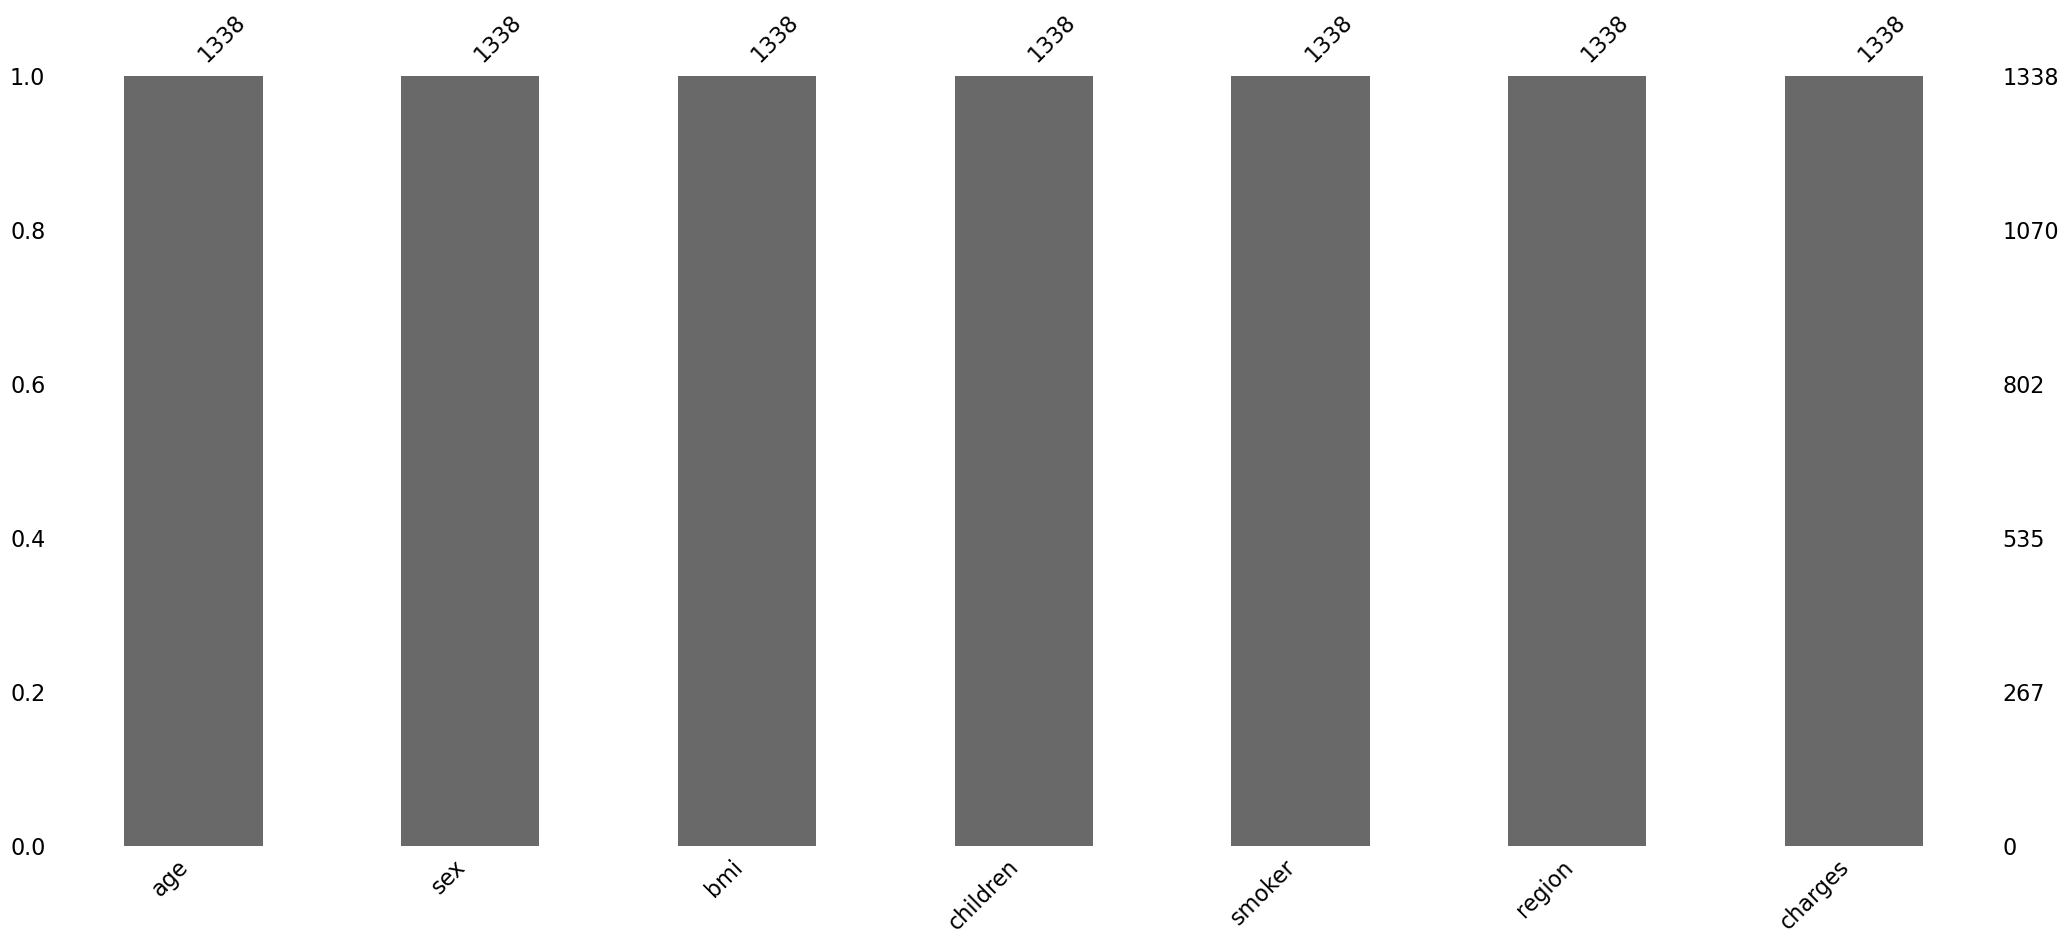

In [5]:
barplot_msno= msno.bar(df_assurance)

## Les doublons

In [6]:
df_assurance[df_assurance.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


### Suppression des doublons

In [7]:
df_assurance = df_assurance.drop_duplicates()

## Les valeurs aberrantes

### Nombre de outliers par colonne

In [25]:
df_assurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Il peut y avoir des outliers dans les valeurs des colonnes dont les types sont numériques : float64 ou int64

In [26]:
numeric_types = ["float64","int64"]
[(column,len([y for stat in boxplot_stats(df_assurance[column]) for y in stat['fliers']])) for column in df_assurance.columns if df_assurance[column].dtype in numeric_types]

[('age', 0), ('bmi', 9), ('children', 0), ('charges', 139)]

### Visualisation des outliers

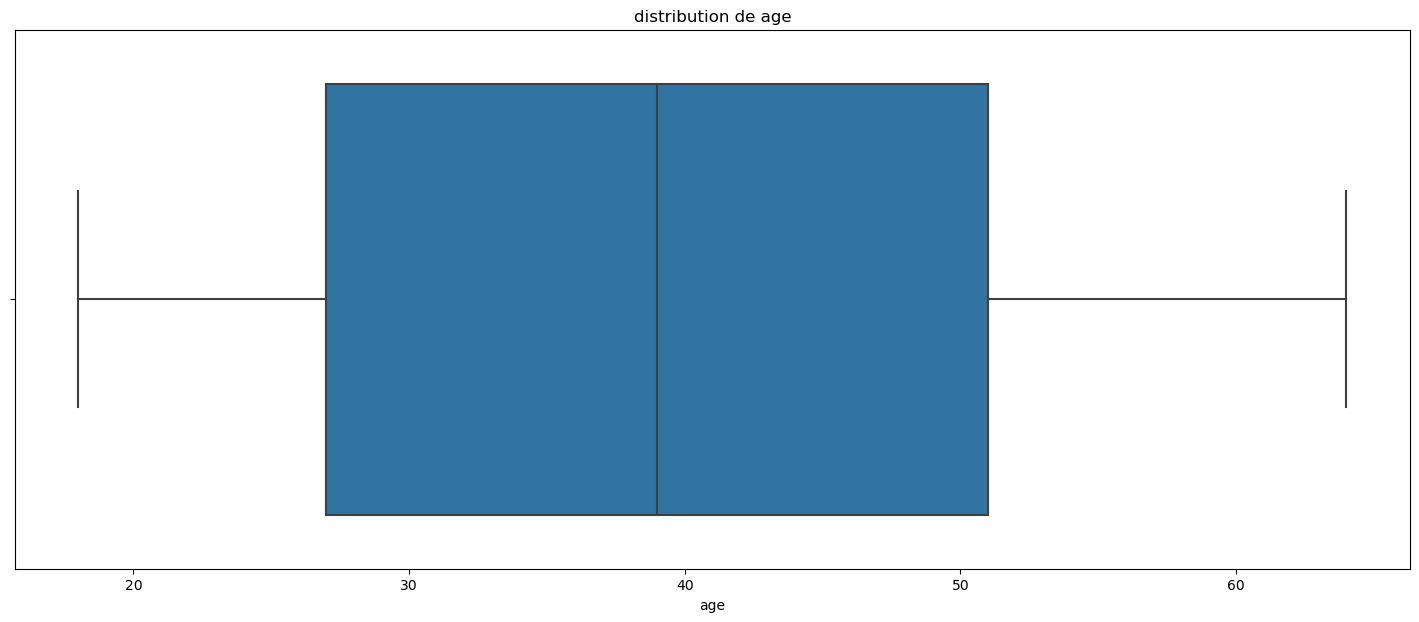

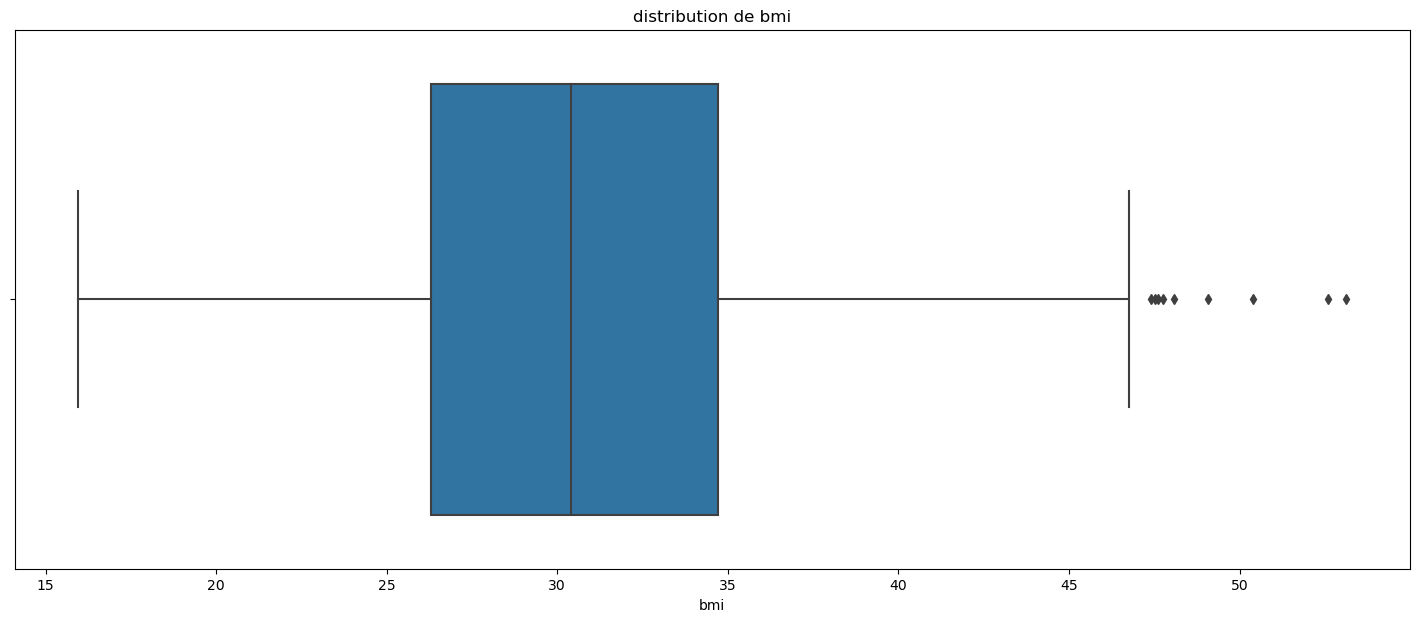

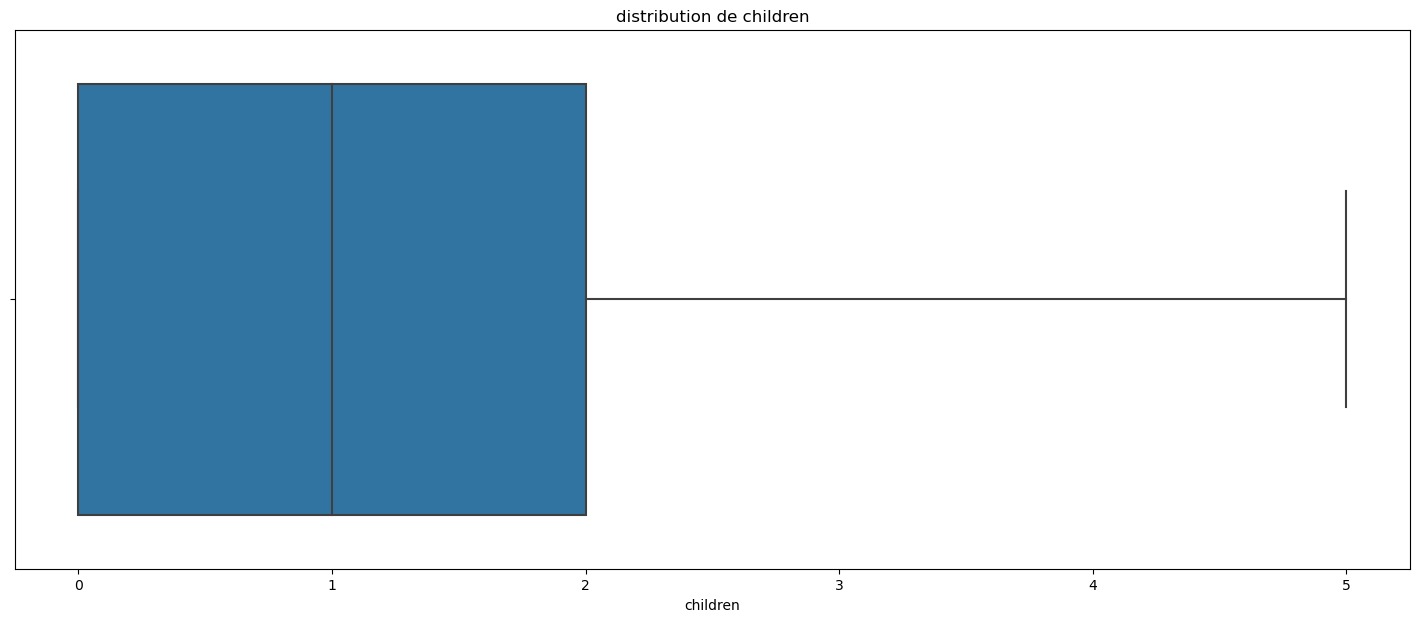

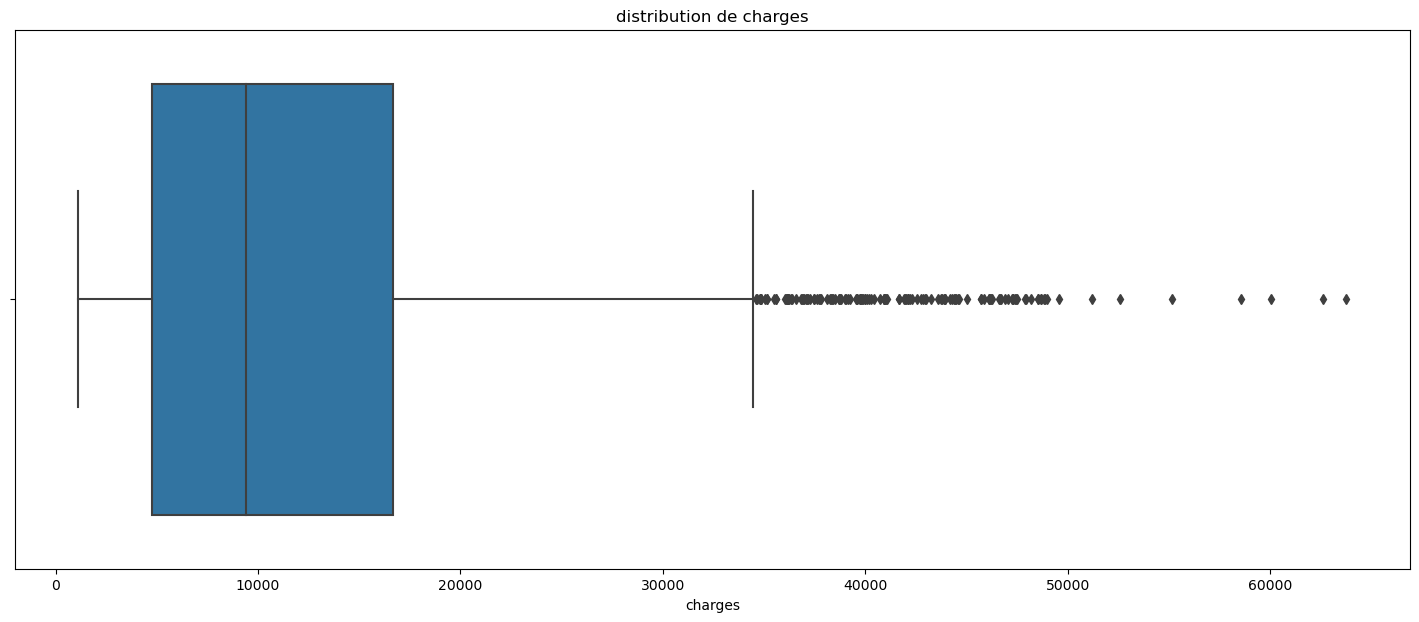

[None, None, None, None]

In [41]:
def visu_bx(column):
    plt.figure(figsize=(18,7))
    plt.title(f"distribution de {column}")
    sns.boxplot(data = df_assurance, x=column)
    plt.show()

[visu_bx(column) for column in df_assurance.columns if df_assurance[column].dtype in numeric_types]

On modifie le seuil à partir duquel une valeur est considérée comme abberante à +/- 2,72*IQ

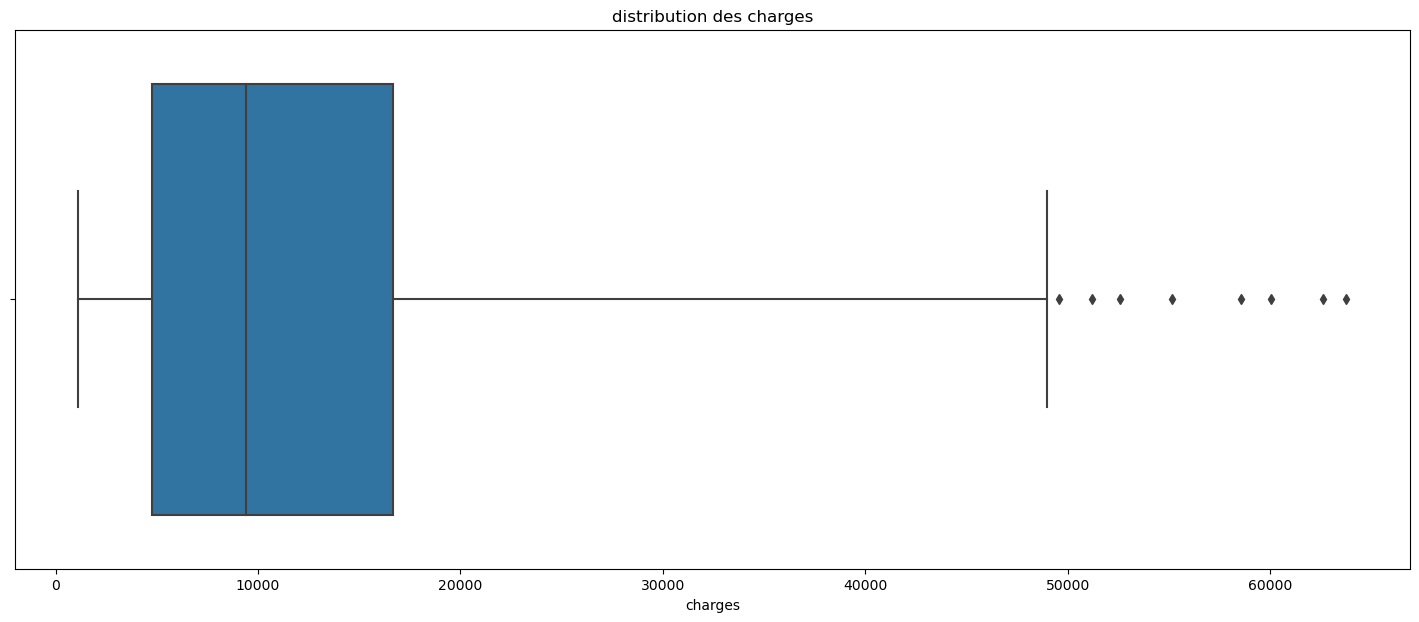

In [35]:
plt.figure(figsize=(18,7))
plt.title("distribution des charges")
sns.boxplot(data = df_assurance, x="charges", showfliers=True, whis=2.72)
plt.show()

In [43]:
def seuils(col,coeff):
    min = df_assurance[col].describe()[3]
    max = df_assurance[col].describe()[7]
    q1 = df_assurance[col].describe()[4]
    q3 = df_assurance[col].describe()[6]
    interQuartile = q3-q1
    seuil = coeff*interQuartile
    seuil_min = q1-seuil
    seuil_max = q3+seuil
    return (seuil_min,min,seuil_max,max)

def print_str_outliers(col,coeff):
    (seuil_min,min,seuil_max,max) = seuils(col,coeff)
    print_inf = f"les valeurs inférieures à {seuil_min}"
    print_sup = f"les valeurs supérieurs à {round(seuil_max,2)}"
    print_fin = "seront considérées comme des valeurs aberrantes"
    if len(df_assurance[(df_assurance[col] < seuil_min)])==0 and len(df_assurance[(df_assurance[col] > seuil_max)])==0:
        print("Il n'y a pas de valeurs abberantes")
    else :
        if len(df_assurance[(df_assurance[col] < seuil_min)])!=0:
            print(print_inf, end=' ')
        if len(df_assurance[(df_assurance[col] > seuil_max)])!=0:
            print(print_sup, end=' ')
        print(print_fin)

def print_outliers(col,coeff):
    (seuil_min,min,seuil_max,max) = seuils(col,coeff)
    return df_assurance[(df_assurance[col] < seuil_min)|(df_assurance[col] > seuil_max)]

In [44]:
print_str_outliers('bmi',1.5)
print_outliers('bmi',1.5)

les valeurs supérieurs à 47.32 seront considérées comme des valeurs aberrantes


,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [45]:
print_str_outliers('charges',2.5)
print_outliers('charges',2.5)

les valeurs supérieurs à 46436.15 seront considérées comme des valeurs aberrantes


,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
39,60,male,39.900,0,yes,southwest,48173.36100
55,58,male,36.955,2,yes,northwest,47496.49445
94,64,female,31.300,2,yes,southwest,47291.05500
109,63,male,35.090,0,yes,southeast,47055.53210
175,63,female,37.700,0,yes,southwest,48824.45000
251,63,female,32.200,2,yes,southwest,47305.30500
281,54,male,40.565,3,yes,northeast,48549.17835
288,59,female,36.765,1,yes,northeast,47896.79135
328,64,female,33.800,1,yes,southwest,47928.03000


On remarque que toutes les charges dont les valeurs sont abberantes sont associées à un profil fumeur

On enregistre le dataFrame légèrement nettoyé dans un csv afin de le réutiliser pour l'analyse

In [47]:
df_assurance.to_csv("cleaning_assurance.csv", index=False)